<a href="https://colab.research.google.com/github/Edugera/DSNP_Projetos_Data_Science/blob/master/DesafioTitanic_kaggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# O começo de tudo
Para iniciar como Cientista de Dados, comecei pelo curso DSNP - DATA SCIENCE NA PRÁTICA do Carlos Melo e lá tive a oportunidade de conhecer as competições no [Kaggle](https://www.kaggle.com/), e a primeira delas para introdução é a [Titanic](https://www.kaggle.com/c/titanic), para começar precisei de alguns tutoriais, a começar pelo site da [sigmoydal](https://sigmoidal.ai/), depois pelo vídeo da [Dr. Rachael Tatman](https://www.kaggle.com/c/titanic) e em seguida pelo passo-a-passo da [Alexis Cook](https://www.kaggle.com/alexisbcook/titanic-tutorial). Tentarei mostrar aqui o caminho feito e comentar os desafios.
E o primeiro deles foi o de criar uma conta no Kaggle, isso foi feito seguindo os passos do curso DSNP, depois foi entrar na competição e importar os dados, então começarei a partir daqui.


## Importação dos Dados


In [ ]:
# importação dos pacotes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#visualizar as colunas
pd.options.display.max_columns = None


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Baixar os arquivos foi quase que desmotivador, cheguei a abrir tudo na máquina e depois subi para o Github e nada de conseguir ler os arquivos. Só consegui, num momento sem querer, cliquei num dos diversos arquivos zip baixados e vi os três arquivos gender_submission, test e train. Sabia que estavam ali e com receio de extrair e virar tudo uma bagunça como antes, bom fui lá e descompactei e estavam disponíveis na máquina. Depois foi só ir no Github e subir (upload) os arquivos. Para usar aqui no Colab peguei o link no raw.

## Ler os arquivos 

In [ ]:
train = pd.read_csv('https://raw.githubusercontent.com/Edugera/DSNP_Projetos_Data_Science/master/train.csv')
test = pd.read_csv('https://raw.githubusercontent.com/Edugera/DSNP_Projetos_Data_Science/master/test.csv')
gender_submission = pd.read_csv('https://raw.githubusercontent.com/Edugera/DSNP_Projetos_Data_Science/master/gender_submission.csv')

## Identificar as dimensões do arquivo
O comando irá mostrar quantas variáveis (colunas) e quantas (linhas) possui o arquivo?

In [ ]:
# verificando as dimensões do DataFrame
print("Variáveis:\t{}\nEntradas:\t{}".format(train.shape[1],train.shape[0]))
#print("Variáveis:\t{}\nEntradas:\t{}".format(gender_submission.shape[1],gender_submission.shape[0]))

Variáveis:	12
Entradas:	891


# Exploração de Dados



Vamos identificar as variáveis e suas características


## Identificar o tipo de cada variável e ver as primeiras entradas do conjunto de treino

In [ ]:
#identificar o tipo de cada variável
display(train.dtypes)
#display(gender_submission.dtypes)

#ver as primeiras entradas do conjunto de treino
display(train.head())
#display(gender_submission.head())

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Agora vamos identificar em percentuais os valores que faltam 

## Percentual dos valores que faltam

In [ ]:
#percentual dos valores que faltam
(train.isnull().sum()/train.shape[0]).sort_values(ascending=False)

Cabin          0.771044
Age            0.198653
Embarked       0.002245
Fare           0.000000
Ticket         0.000000
Parch          0.000000
SibSp          0.000000
Sex            0.000000
Name           0.000000
Pclass         0.000000
Survived       0.000000
PassengerId    0.000000
dtype: float64

São apresentados em ordem de maior porcentagem de informações faltantes, sendo Cabin com o maior percentual, aproximadamente 77%, Age e Embarked com menos e as outras estão preenchidas. 

Vamos olhar a distribuição estatísticas dos dados e mostrar os histograma

## Distribuição Estatística

In [ ]:

train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


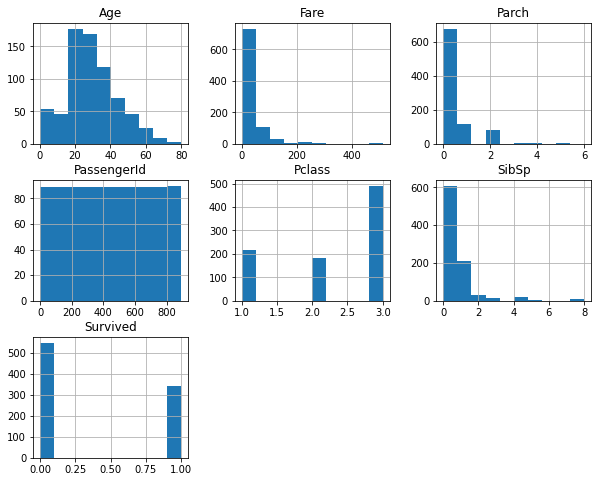

In [ ]:
train.hist(figsize=(10,8));

Note o ponto vírgula (;) no final do comando antes do histograma, é usado para evitar mostra informações não relevantes, neste caso, antes dos histogramas.

Agora vamos identificar o percentual de chances de sobrevivência pela categoria sexo (Sex)

## Análise da probabilidade de sobrevivência pelo sexo

In [ ]:
#análise da probabilidade de sobrevivência pelo sexo
train[['Sex', 'Survived']].groupby(['Sex']).mean()

,Survived
Sex,
female,0.742038
male,0.188908


Vemos que o sexo feminino teve muito mais chances de sobrevivência.
Agora iremos olhar os gráficos comparativo de sobreviventes (Survived), sexo (Sex), classe (Pclass) e local de embarque(Embarked)

## Gráficos comprarativos de sobreviventes, sexo, classe e loca de embarque

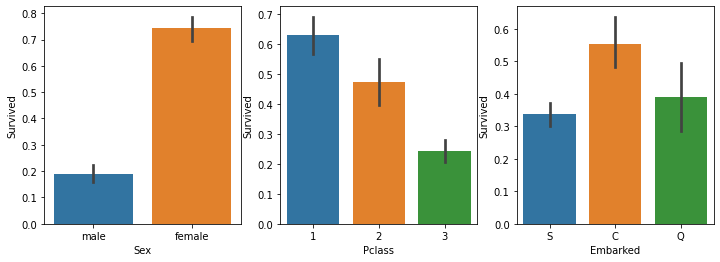

In [ ]:
#Gráficos comprarativos de sobreviventes, sexo, classe e loca de embarque
fig, (axis1, axis2, axis3)=plt.subplots(1,3,figsize=(12,4))

sns.barplot(x='Sex', y='Survived', data=train, ax=axis1)
sns.barplot(x='Pclass', y='Survived', data=train, ax=axis2)
sns.barplot(x='Embarked', y='Survived', data=train, ax=axis3)

E assim podemos identificar que mulheres, da primeira classe e que embarcaram em Cherbourg (C) foram as que mais sobreviveram.

Agora vamos ver a relação da idade na sobrevivência.

## Gráfico da influência da idade na sobrevivência

## Gráfico da influência da idade na sobrevivência

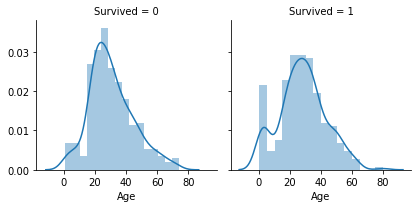

In [ ]:
#gráfico da influência da idade na sobrevivência
age_survived = sns.FacetGrid(train, col='Survived')
age_survived.map(sns.distplot, 'Age')

E em seguida vamos olhar as matrizes de dispersão em vários gráficos de dispersão aos pares das variáveis apresentadas. Servirá para determinar se as variáveis estão correlacionadas e se a correlação é positiva ou negativa.

## Matrizes de dispersão (scatter matrix)

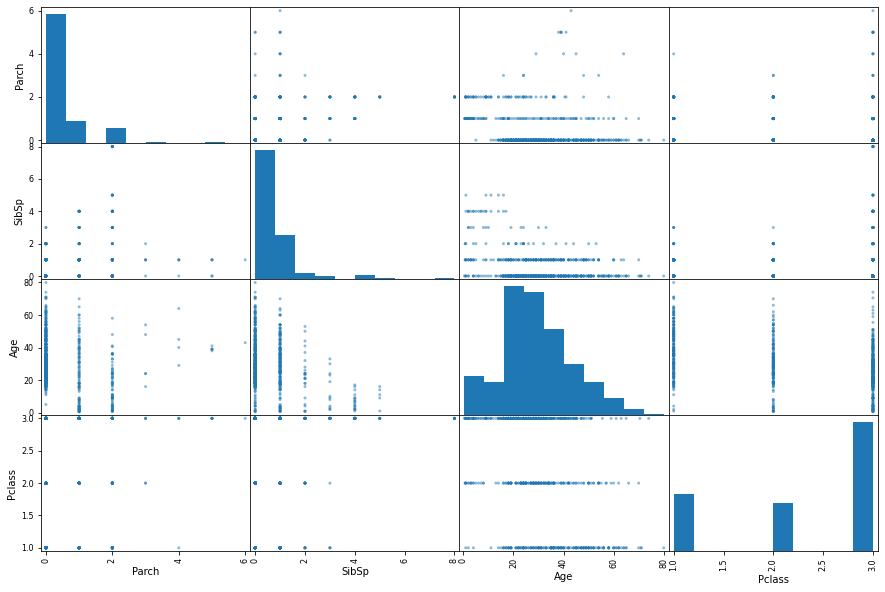

In [ ]:
#plotar matrizes de dispersão (scatter matrix)
columns=['Parch', 'SibSp', 'Age', 'Pclass']
pd.plotting.scatter_matrix(train[columns], figsize=(15,10));

E agora o mapa de calor (heatmap) vamos visualizar os dados e identificar as magnitudes pela cor em duas dimensões, obtendo pistas visuais óbvias ao leitor sobre como o fenômeno está agrupado ou varia no espaço.

## Plotar o mapa de calor (heatmap) para as variáveis numéricas

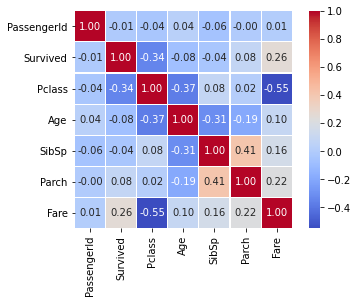

In [ ]:
#plotar o mapa de calor (heatmap) para as variáveis numéricas
sns.heatmap(train.corr(), cmap='coolwarm', fmt='.2f', linewidths=0.1,
            vmax=1.0, square=True, linecolor='white', annot=True);

E na sequência usaremos o método de Estatística Descritiva que permite resumir a tendência central, dispersão e forma da distribuição do conjunto de dados, excluindo os valores de NaN. Isto é, a análise de séries numéricas e de objetos, bem como conjuntos de colunas DataFrame de tipos de dados mistos. 

## Tabela de estatística descritiva

In [ ]:
#tabela de estatística descritiva
train.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Pernot, Mr. Rene",male,1601,B96 B98,S
freq,1,577,7,4,644


Assim nossa análise de dados acima nos fornece as seguintes informações:

- Os valores para Name são únicos, um para cada pessoa;
- Não há missing values para Name e Sex;
- Existem apenas os sexos Masculino e Feminino, sendo que o com maior frequência é o Masculino (577/891 = 65%);
-  O Porto no qual embarcaram mais passageiros é o de S = Southampton.

# Preparação dos Dados



Vamos montar o modelo de Machine Learnig, e para isso precisaremos preparar os dados, juntar os datasets de treino e teste em um único.
Nós vamos fazer o que chamamos de feature engineering, criar variáveis dummy ou codificar as variáveis. 
A engenharia de recursos é o processo de usar o conhecimento de domínio para extrair recursos de dados brutos por meio de técnicas de mineração de dados. Esses recursos podem ser usados ​​para melhorar o desempenho dos algoritmos de aprendizado de máquina.
Variáveis dummy são variáveis binárias (0 ou 1) criadas para representar uma variável com duas ou mais categorias. Por exemplo, dummy_sexo = 1 em caso de sexo feminino. dummy_sexo = 0 em caso de sexo masculino.


In [ ]:
# Salvar os índices dos datasets para recuperação posterior
train_idx = train.shape[0]
test_idx = test.shape[0]

# Salvar identificação do passageiro (PassengerId) para submissão ao Kaggle
passengerId = test['PassengerId']

# Extrair coluna de sobreviventes (Survived) e excluir ela do Dataset treino
target = train.Survived.copy()
train.drop(['Survived'], axis=1, inplace=True)

# Concatenar treino e teste em um único DataFrame
df_merged = pd.concat(objs=[train, test], axis=0).reset_index(drop=True)

print("df_merged.shape: ({} x {})".format(df_merged.shape[0], df_merged.shape[1]))

df_merged.shape: (1309 x 11)


Agora vamos desconsiderar as variáveis que não são relevantes, escolhemos a identificação de passageiros (PassengerId), o nome (Name), o tiquet (Ticket) e a cabine (Cabin) e as outras serão as features do modelo Machine Learnig.

In [ ]:
# Excluindo as variáveis não relevantes
df_merged.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

Então iremos tratar das variáveis classe (Pclass), sexo (Sex), idade (Age), quantidade de cônjuge e irmãos a bordo (Sispd), quantidade de pais e filhos a bordo (Parch), preço da passagem (Fare) e local de embarque (Embarqued)

In [ ]:
# Completar ou apagar valores faltantes no Datasets de treino e teste
df_merged.isnull().sum()

Pclass        0
Sex           0
Age         263
SibSp         0
Parch         0
Fare          1
Embarked      2
dtype: int64

A escolha para preenchimento seguirá os seguintes critérios:
Mediana para idade e tarifa
Maior frequência para porto de embarque

In [ ]:
# Age
age_median = df_merged['Age'].median()
df_merged['Age'].fillna(age_median, inplace=True)

# Fare
fare_median = df_merged['Fare'].median()
df_merged['Fare'].fillna(fare_median, inplace=True)

# Embarked
embarked_top = df_merged['Embarked'].value_counts()[0]
df_merged['Embarked'].fillna(embarked_top, inplace=True)

Vamos transformar tudo em variáveis numéricas

In [ ]:
# Converter Sex em 0 e 1
df_merged['Sex'] = df_merged['Sex'].map({'male':0, 'female':1})

# dummie variables Embarked
embarked_dummies = pd.get_dummies(df_merged['Embarked'], prefix='Embarked')
df_merged = pd.concat([df_merged, embarked_dummies], axis=1)
df_merged.drop('Embarked', axis=1, inplace=True)

display(df_merged.head())

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_914,Embarked_C,Embarked_Q,Embarked_S
0,3,0,22.0,1,0,7.2500,0,0,0,1
1,1,1,38.0,1,0,71.2833,0,1,0,0
2,3,1,26.0,0,0,7.9250,0,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,0,1
4,3,0,35.0,0,0,8.0500,0,0,0,1


E agora, vamos recuperar os datasets separados, vamos dividir df_merged em train e test.

In [ ]:
# Recuperar datasets de treino e teste
train = df_merged.iloc[:train_idx]
test = df_merged.iloc[test_idx:]

Agora vamos para os modelos de Machine Learnig, usaremos Regressão Logística e Árvore de decisão

In [ ]:
# Imporação da biblioteca de Machine Learning
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier


In [ ]:
# criar um modelo de Regressão Logística
lr_model = LogisticRegression(solver='liblinear')
lr_model.fit(train, target)



# Verificar a acurácia do modelo
acc_logReg = round(lr_model.score(train, target)*100,2)
print('Acurácia do Modelo de Regressão Logística: {}'.format(acc_logReg))

Acurácia do Modelo de Regressão Logística: 80.13


In [ ]:
# Criar um modelo de árvore de decisão
tree_model = DecisionTreeClassifier(max_depth=3)
tree_model.fit(train, target)

# Verificar a acurácia do modelo
acc_tree = round(tree_model.score(train, target)*100, 2)
print("Acurácia modelo modelo de árvore de decisão : {}".format(acc_tree))

Acurácia modelo modelo de árvore de decisão : 82.72


O construímos o modelo de regressão logística com acurácia de 80% em cima do conjunto de dados do treino e em seguida construímos o modelo de árvore de decisão que apresnta 82,72% de acurácia.

Agora vamos submeter o modelo no dataset de test para submeter ao Kaggle e comparar o desempenho.

In [ ]:
y_pred_lr = lr_model.predict(test)

submission = pd.DataFrame({
    "PassengerId": passengerId,
    "Survived": y_pred_lr
})

# Gerar arquivo CSV
submission.to_csv('./submission_lr.csv', index=False)

ValueError: ignored

In [ ]:
y_pred_tree = tree_model.predict(test)

submission = pd.DataFrame({
    "PassengerId": passengerId,
    "Survived": y_pred_tree
})

# gerar arquivo csv
submission.to_csv('./submission_tree.csv', index=False)

ValueError: ignored

In [ ]:
# declarar os valores das variáveis para mim e minha esposa
Eduardo_Ferreira = np.array([2, 0, 49, 1, 1, 32.2, 0, 0, 0, 1]).reshape((1, -1))
Danielle_Ferreira = np.array([2, 1, 40, 1, 1, 32.2, 0, 0, 0, 1]).reshape((1, -1))

# verificar se nós teríamos sobrevivido
print("Eduardo Ferreira:\t{}".format(tree_model.predict(Eduardo_Ferreira)[0]))
print("Danielle Ferreira:\t{}".format(tree_model.predict(Danielle_Ferreira)[0]))